# California Housing Dataset 

## Loading the Datasets

In [42]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
california = fetch_california_housing(as_frame=True)

# Convert the data to a Pandas DataFrame (optional, but often convenient)
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Print first 5 rows
print(df.head())

# Print dataset description
print(california.DESCR)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - 

# Summary Statistics

## Basic Info

In [43]:
#Overview

print(df.shape)
print(df.dtypes)
print(df.head())

(20640, 9)
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [44]:
#summary statistics

print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

## Estimate of Location

In [45]:
from scipy.stats import trim_mean

# Calculate and print statistics
print(f"{'Column':<15} {'Mean':>10} {'Trimmed Mean':>20} {'Median':>15}")
print("=" * 63)

for col in df.columns:
    mean_val = df[col].mean()
    trimmed_mean_val = trim_mean(df[col], proportiontocut=0.1)  # trims 10% from both ends
    median_val = df[col].median()

    print(f"{col:<15} {mean_val:>10.3f} {trimmed_mean_val:>20.3f} {median_val:>15.3f}")

Column                Mean         Trimmed Mean          Median
MedInc               3.871                3.654           3.535
HouseAge            28.639               28.495          29.000
AveRooms             5.429                5.253           5.229
AveBedrms            1.097                1.053           1.049
Population        1425.477             1256.513        1166.000
AveOccup             3.071                2.858           2.818
Latitude            35.632               35.508          34.260
Longitude         -119.570             -119.518        -118.490
MedHouseVal          2.069                1.928           1.797


## Estimate of Variability 

In [46]:
from scipy.stats import iqr, median_abs_deviation

print(f"{'Column':<15} {'Std Dev':>10} {'IQR':>10} {'MAD':>10}")
print("=" * 48)

for col in df.columns:
    std_dev = df[col].std()
    iqr_val = iqr(df[col])
    mad_val = median_abs_deviation(df[col])

    print(f"{col:<15} {std_dev:>10.3f} {iqr_val:>10.3f} {mad_val:>10.3f}")

Column             Std Dev        IQR        MAD
MedInc               1.900      2.180      1.064
HouseAge            12.586     19.000     10.000
AveRooms             2.474      1.612      0.803
AveBedrms            0.474      0.093      0.046
Population        1132.462    938.000    440.000
AveOccup            10.386      0.853      0.420
Latitude             2.136      3.780      1.230
Longitude            2.004      3.790      1.280
MedHouseVal          1.154      1.451      0.684


# Missing Values Check 

In [47]:
#check for missing value

print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


# Visualisation

## Exploring the Data Distribution

### Boxplot

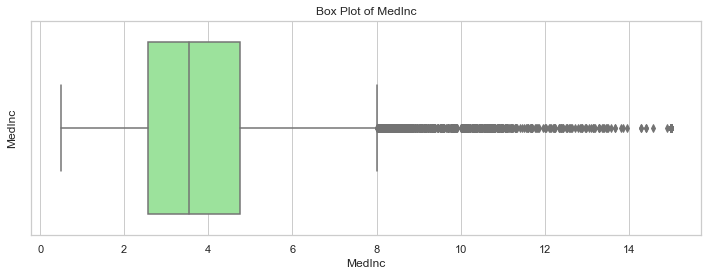

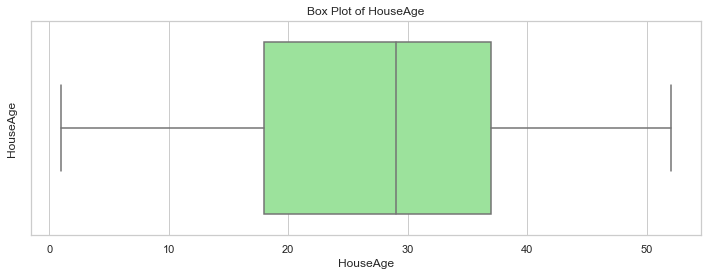

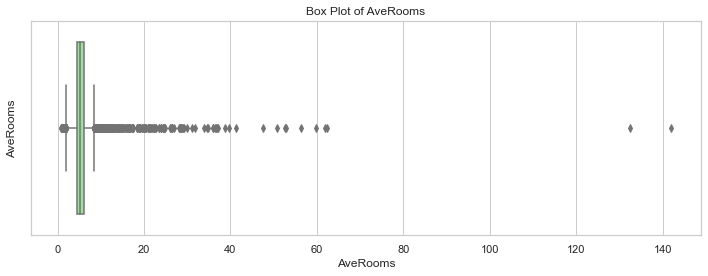

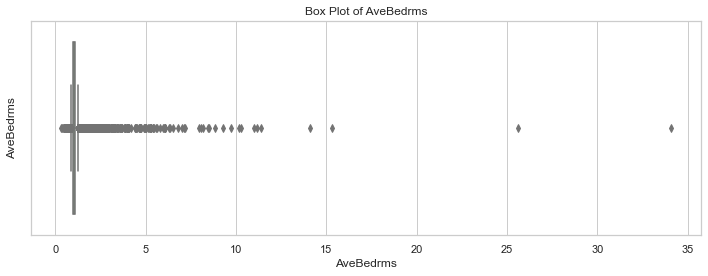

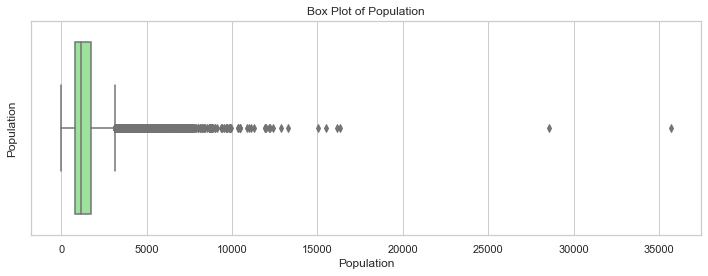

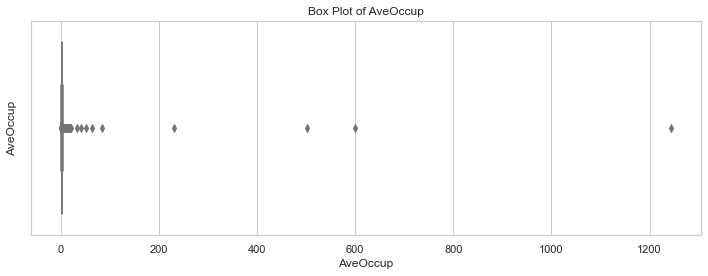

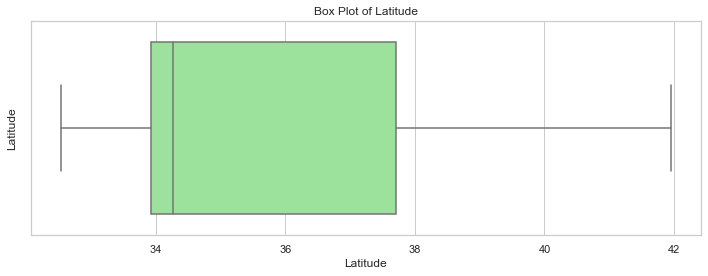

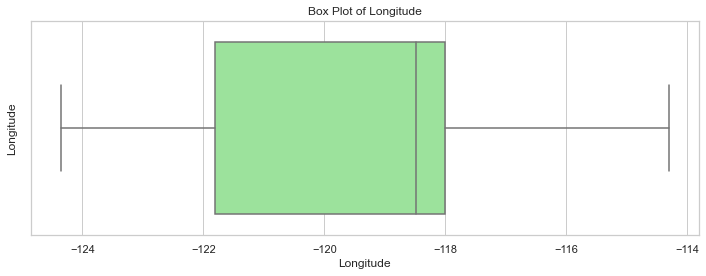

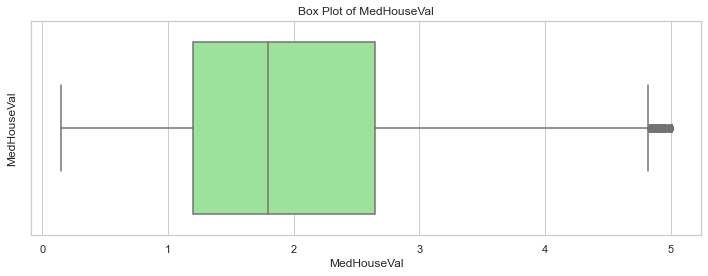

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Draw one boxplot per feature in a separate figure
for col in df.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### Histogram 

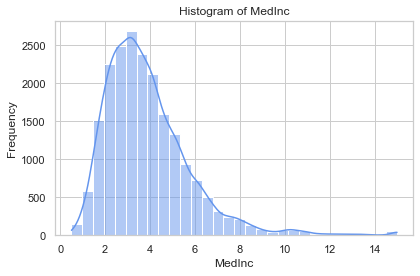

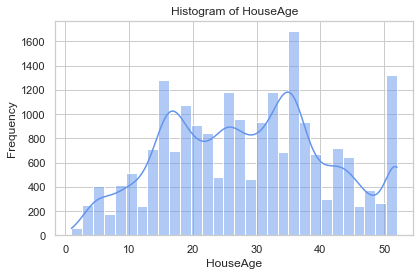

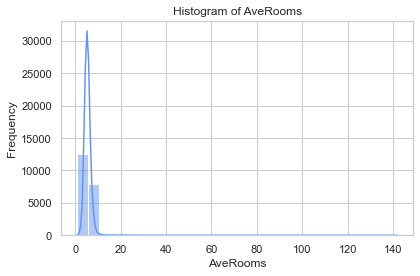

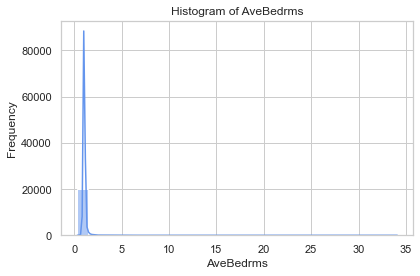

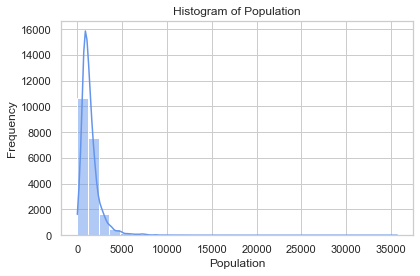

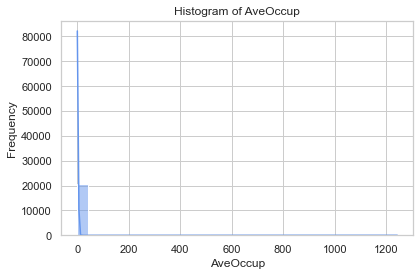

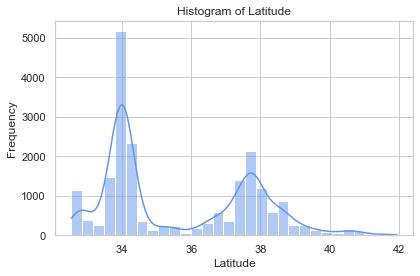

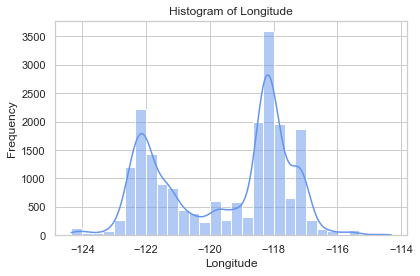

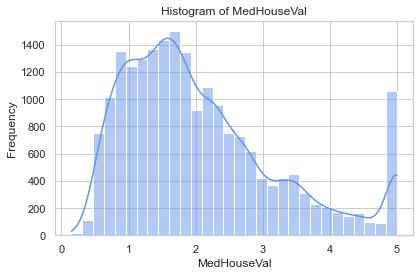

In [49]:
# Set plotting style
sns.set(style="whitegrid")

# Draw a separate histogram for each feature
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True, color='cornflowerblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Heatmap 

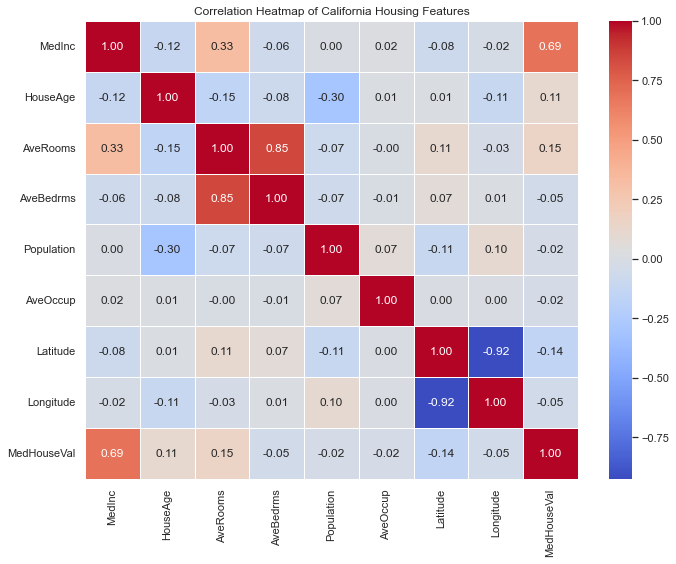

In [54]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of California Housing Features')
plt.tight_layout()
plt.show()

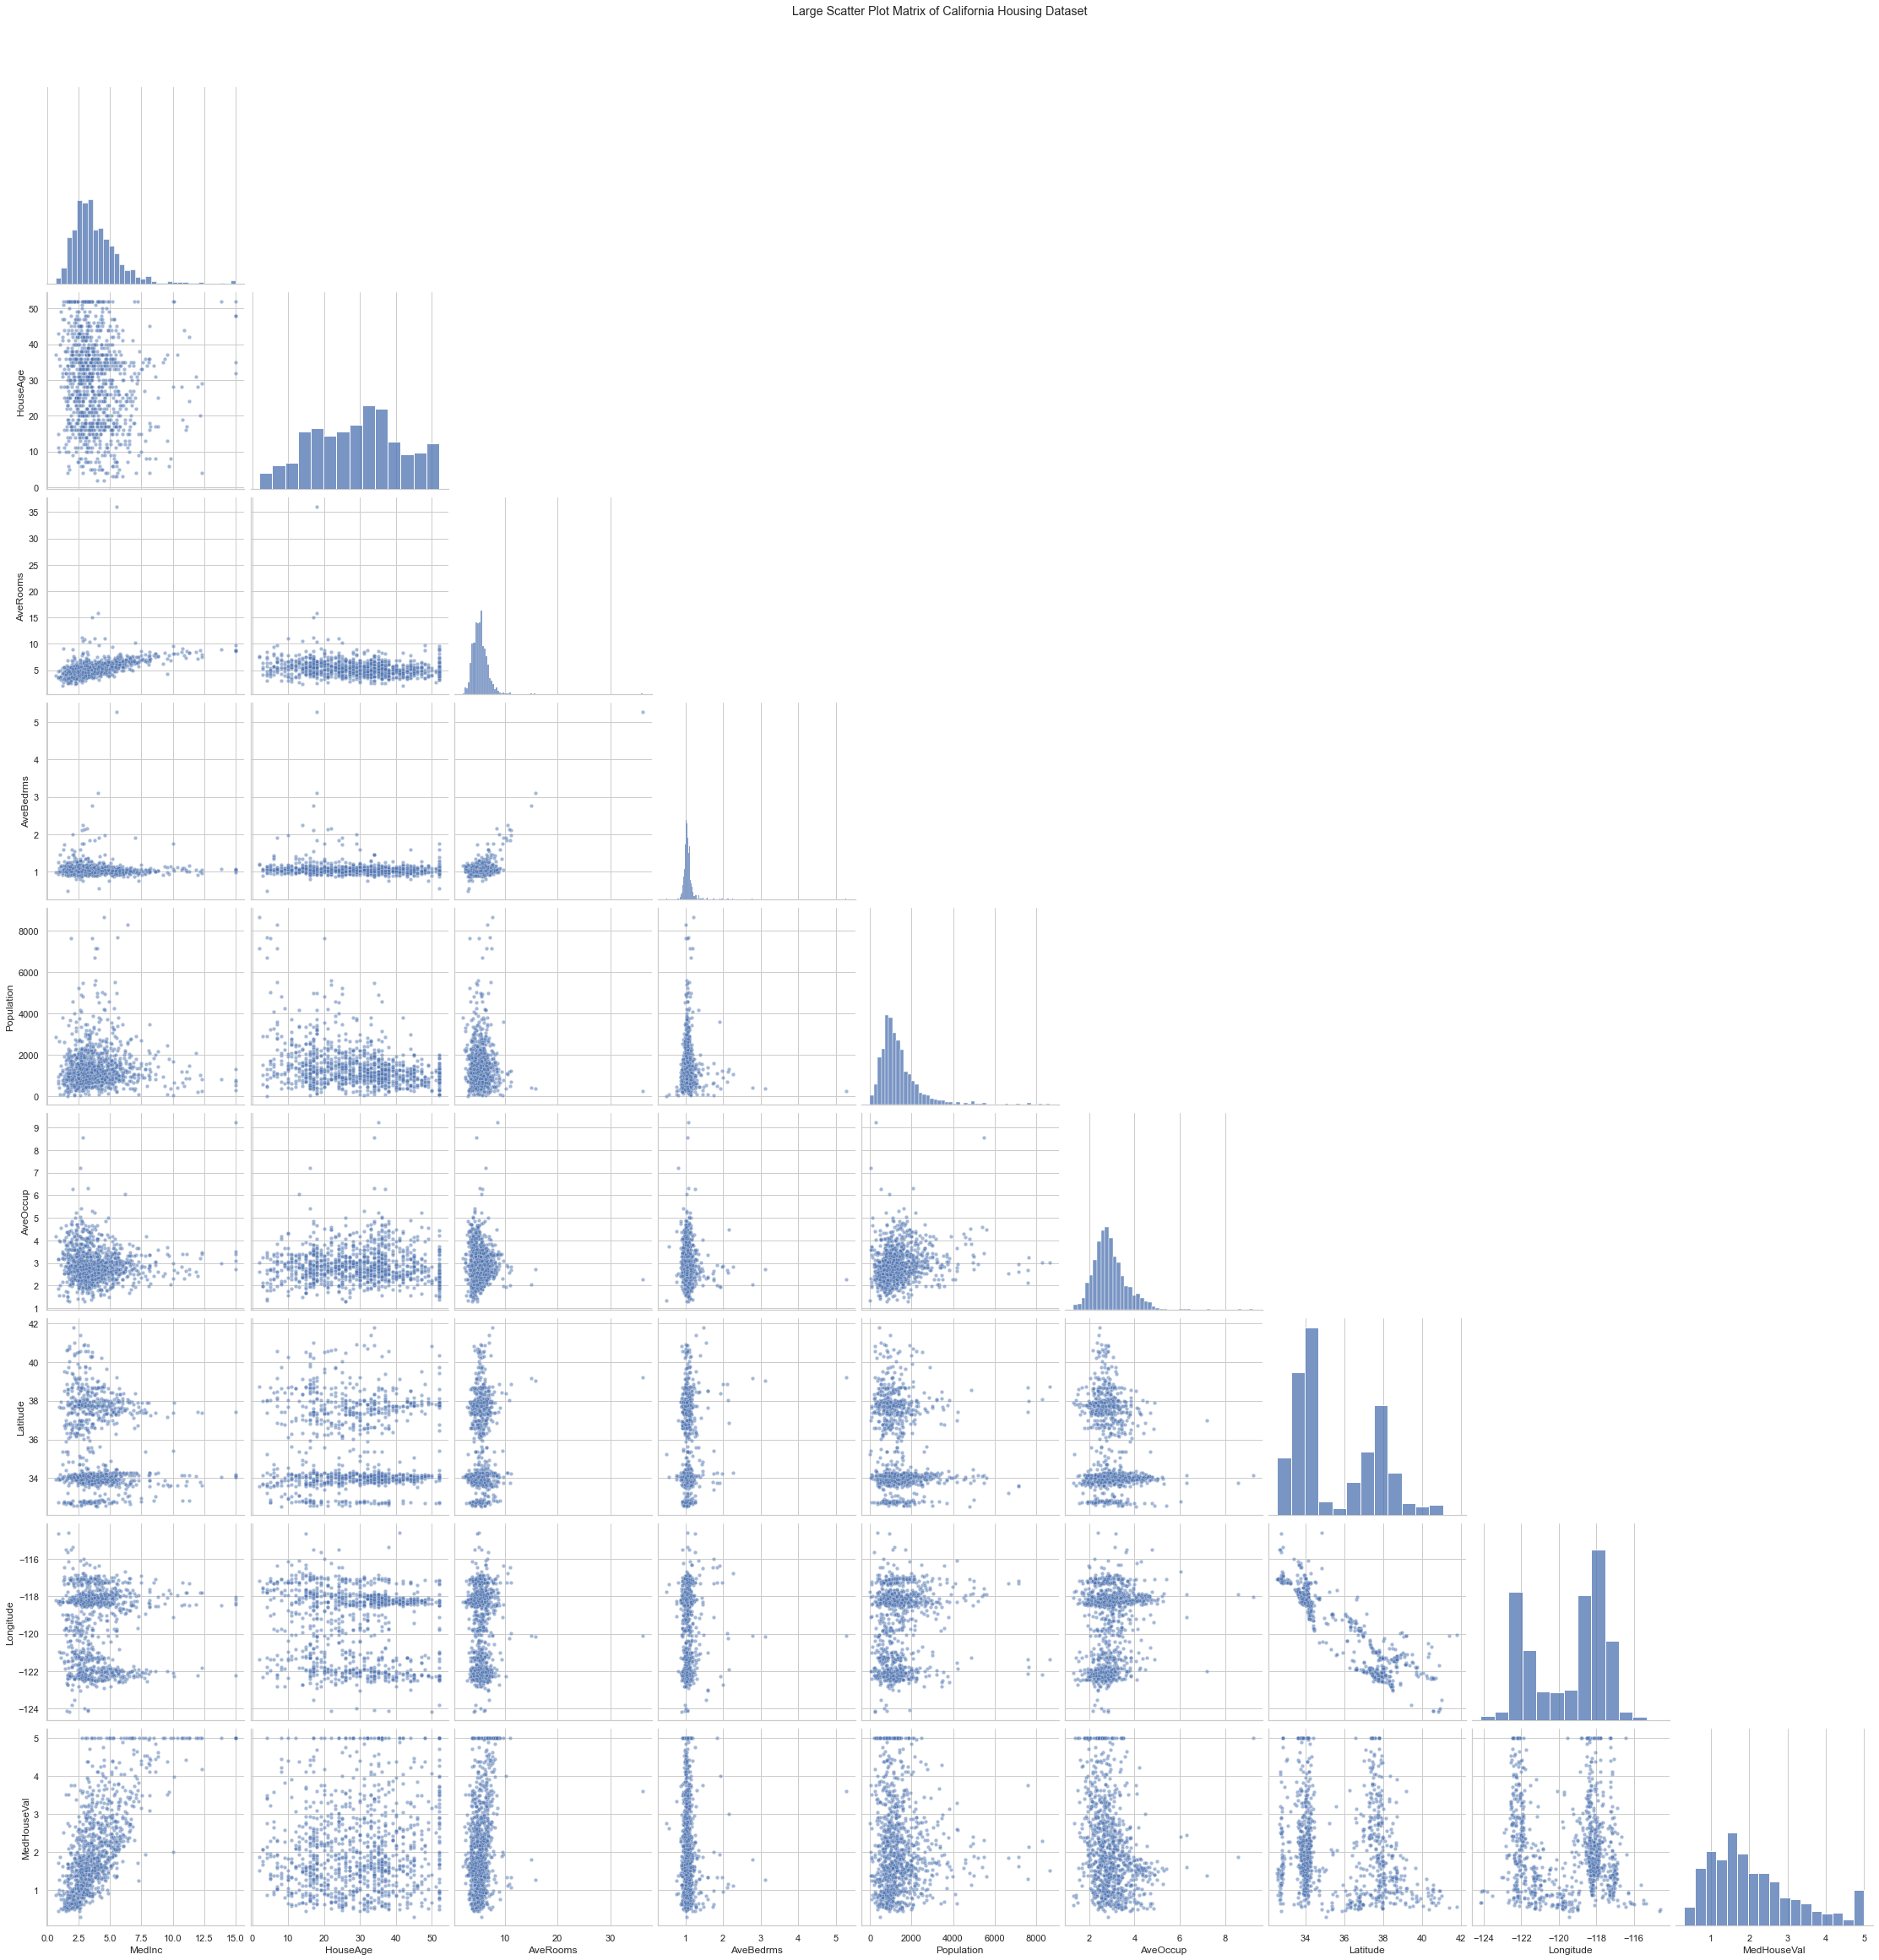

In [56]:
df_sample = df.sample(1000, random_state=42)

# Set plot style and size
sns.set(style="whitegrid")
plot = sns.pairplot(
    df_sample,
    corner=True,
    height=3.5,     # Each subplot will be 3.5 inches tall/wide
    plot_kws={'alpha': 0.5, 's': 20}  # transparency and point size
)

# Add a main title
plot.fig.suptitle("Large Scatter Plot Matrix of California Housing Dataset", y=1.03)
plt.show()